In [64]:
# question 1.

def binarysearch(a,key):
# n is length of the list/array.    
    n=len(a)
# l is the index of first element.    
    l=0
# h is the index of the last object.    
    h=n-1
    
# while loop will execute till l is less than equal to h.
    while l<=h:
# m is the index of the middle element.
# as we need the floor value int is used.
        m= int((l + h)/2)
# a[m] gives the element at index m.    
        if a[m]==key:
            return a[m],m 
        if a[m]>key:
            h=m-1
        else :
            l=m+1
        if l>h :
            return ('not found')
        
a=[8,12,22,45,88,99]
key=22
binarysearch(a,key)
        

(22, 2)

In [57]:
#Question 2
lett_num={'a':2,'b':3,'c':4,'d':5,'e':6,'f':7,'g':8,'h':9,'i':10,'j':11,'k':12,'l':13,'m':14,'n':15,'o':16,'p':17,'q':18,
         'r':19,'s':20,'t':21,'u':22,'v':23,'w':24,'x':25,'y':26,'z':27,' ':28}
num_lett={2:'a',3:'b',4:'c',5:'d',6:'e',7:'f',8:'g',9:'h',10:'i',11:'j',12:'k',13:'l',14:'m',15:'n',16:'o',17:'p',18:'q',
         19:'r',20:'s',21:'t',22:'u',23:'v',24:'w',25:'x',26:'y',27:'z',28:' '}
p_prime_alice= 97
q_prime_alice=113
p_prime_bob= 127
q_prime_bob= 73

n_alice= p_prime_alice * q_prime_alice
n_bob= p_prime_bob * q_prime_bob
# print(n_bob)
# print(n_alice)
euler_alice= (p_prime_alice - 1) * (q_prime_alice - 1)
# print(euler_alice)
euler_bob= (p_prime_bob - 1) * (q_prime_bob - 1)
# print(euler_bob)

public_alice= 73
public_bob= 41

#to find PRIVATE keys for bob and alice

def extended_gcd(m,n):
    if n==0:
        return (1,0,m)
    if n==1:
        return (0,1,1)
    Q=[]
    d=1
    a=m 
    b=n
    while True:
        r= a % b
        quo= a / b
        Q.append(int(quo))
        if r==0:
            d=b
            
            break
        tmp=b
        b= a%b
        a=tmp
    x=1
    y=0 
    s= len(Q)
    for i in range(s):
        tmp=y
        y=x-y* Q.pop()
        x=tmp
    
    if y<0:
        y= m+y
    return(y)    

alice_secret=extended_gcd(euler_alice,public_alice)
print(alice_secret)

bob_secret=extended_gcd(euler_bob,public_bob)
print(bob_secret)

    

9721
5753


In [58]:
#encrypt the message sent by bob using bob's secret key
x='buy google'
# y='bob'
c=[]
#concat=''
def encode(x,c):
    for i in x:
        c.append(i)
    print(c)  
    concat=''
    for letter in c:
        l=lett_num[letter]
        message= str(l**bob_secret % n_bob)
        if(len(message)!= 5):
            for a in range(5-len(message)):
                message = '0' + message
        concat += str(message)
    return concat


#         print(concat)        
encode1=encode(x,c)
print(encode1)

['b', 'u', 'y', ' ', 'g', 'o', 'o', 'g', 'l', 'e']
08346045480769402137011590127801278011590853008491


In [59]:
#bob add is signature or name using alice's public key
z=[]
x1='bob'
def encodesign(x1,z):
    for i in x1:
        z.append(i) 
    concat=''
    for letter in z:
        l=lett_num[letter]
        message= str(l**public_alice % n_alice)
        if(len(message)!= 5):
            for a in range(5-len(message)):
                message = '0' + message
        concat += str(message)
    return concat
    
encode2=encodesign(x1,z)
print(encode2)

008700816400870


In [60]:
#message along with the signature
encode_message_with_bob_sign= encode1 + encode2
print(encode_message_with_bob_sign)

08346045480769402137011590127801278011590853008491008700816400870


In [61]:
a=len(str(encode_message_with_bob_sign))
j=5
i=0
d=[]
while a>0:
    x=encode_message_with_bob_sign[i:j]
    d.append(x)
    j+=5
    i+=5
    a-=5
print(d)  

['08346', '04548', '07694', '02137', '01159', '01278', '01278', '01159', '08530', '08491', '00870', '08164', '00870']


In [62]:
#alice using her private key to see the message
c=0
for i in reversed(d):
    i=int(i)
    decode_letter=i**alice_secret % n_alice
    print(num_lett[decode_letter])
    c+=1
    if c==3:
        break

b
o
b


In [63]:
#after seeing the message is from bob she uses bob's public key to read the message
n=0
for i in d:
    i=int(i)
    decode_letter=i**public_bob % n_bob
#     print(decode_letter)
    print(num_lett[decode_letter])
    n+=1
    if n==10:
        break
    

b
u
y
 
g
o
o
g
l
e


In [1]:
#Question 5
def hashf1(k,A,m):
    
    hash_k= int(m*(k*A % 1))
    return hash_k


In [2]:
def hashf2(k,A,m):
    hash2_k= k%m
    return hash2_k


In [3]:
import random
keys=random.sample(range(0,9999),100)
import statistics
import matplotlib.pyplot as plt

In [4]:



def hashit(keys,A,m,method):
    list_hash=[]
    hash_table=[0] * m
    for i in range(m):
        hash_table[i] = []
    for i in keys:
#         print(i)
        list_hash.append(method(i,A,m))  #hashf1
        
    for j in range(len(keys)):
        
        hash_table[list_hash[j]].append(keys[j])
        
            
    print('list of hashed key values:',list_hash)
    print('------------------------------------------------------------')
    print('list of values in hash table:',hash_table)
    print('------------------------------------------------------------')
    empty=0
    c=[]
    for l in range(len(hash_table)):
        c.append(len(hash_table[l]))
        if len(hash_table[l])==0:
            
            empty=empty+1
    print('number of empty cell:', empty)        
    print('--------------------------------------------------------------')
    print('value of length of list:',c)
    x=statistics.variance(c)
    print('varience of list:',x)
    print('---------------------------------------------------------------')
    plt.hist(c)
    plt.show()

   

list of hashed key values: [2, 8, 8, 1, 7, 5, 4, 1, 0, 4, 5, 0, 8, 1, 5, 4, 8, 8, 1, 9, 0, 2, 3, 7, 2, 8, 6, 2, 9, 3, 3, 9, 6, 4, 3, 3, 6, 3, 2, 7, 3, 5, 3, 6, 5, 4, 1, 1, 1, 5, 6, 0, 7, 6, 2, 8, 9, 6, 8, 6, 6, 4, 0, 9, 7, 7, 8, 2, 2, 6, 1, 8, 4, 9, 6, 1, 2, 0, 2, 9, 1, 3, 9, 3, 3, 2, 1, 8, 7, 4, 8, 7, 1, 0, 9, 7, 0, 5, 8, 5]
------------------------------------------------------------
list of values in hash table: [[5592, 1314, 4126, 4736, 6244, 9294, 5613, 9286], [5055, 2437, 5110, 2183, 6631, 1636, 1416, 9359, 641, 4712, 2335, 9634], [5479, 625, 1209, 6149, 1214, 3340, 6293, 9275, 8152, 7424, 8296], [1185, 4955, 185, 1863, 2468, 9966, 1727, 5455, 6361, 5654, 6251], [4913, 1732, 279, 6722, 4240, 1808, 8510, 6735], [4355, 9481, 4177, 8439, 5533, 8083, 1996, 9900], [9494, 2077, 3250, 7135, 2412, 3297, 3538, 2043, 700, 3920, 2784], [7585, 5297, 671, 8826, 8690, 773, 9525, 2993, 4687], [4040, 291, 6014, 9339, 9538, 846, 1066, 5726, 435, 592, 2019, 2998, 3184], [8459, 3799, 8370, 2859, 77

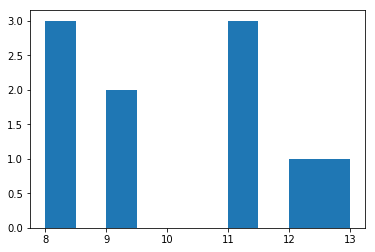

In [5]:
k=keys

m=10
A= ((5**.5)-1)/2
ob=hashit(k,A,m,hashf1)

In [ ]:
variance_of_len=

list of hashed key values: [7, 3, 3, 7, 4, 2, 4, 0, 9, 8, 2, 0, 9, 5, 0, 0, 8, 0, 0, 1, 3, 2, 4, 5, 0, 9, 0, 6, 1, 4, 8, 5, 5, 6, 4, 2, 6, 1, 6, 3, 2, 6, 2, 8, 0, 0, 9, 6, 4, 2, 9, 7, 2, 3, 8, 1, 9, 4, 1, 7, 5, 6, 3, 1, 0, 7, 7, 0, 3, 5, 3, 9, 8, 5, 6, 6, 3, 3, 1, 3, 1, 6, 1, 4, 0, 7, 6, 1, 2, 4, 7, 1, 3, 9, 3, 1, 1, 1, 1, 6]
------------------------------------------------------------
list of values in hash table: [[2437, 1314, 4177, 279, 9538, 2183, 1209, 9494, 5533, 4240, 8690, 6293, 6251], [8459, 3799, 9966, 1066, 5726, 7781, 7424, 4712, 1385, 2019, 2993, 4687, 9286, 1996, 3184], [4355, 9481, 625, 2468, 1727, 5455, 8083, 8826, 9525], [4040, 291, 4126, 671, 3297, 6244, 9275, 9359, 8152, 9294, 144, 9634, 7705], [7585, 4913, 1185, 4955, 1863, 1416, 3538, 5654, 6735], [5110, 5297, 8370, 2077, 700, 3920, 5998], [6149, 6722, 3250, 1214, 8439, 1636, 1808, 2784, 641, 6361, 2335, 9900], [5479, 5055, 4736, 2043, 773, 435, 8296, 2998], [1732, 9339, 185, 7135, 3340, 8510], [5592, 6014, 846, 66

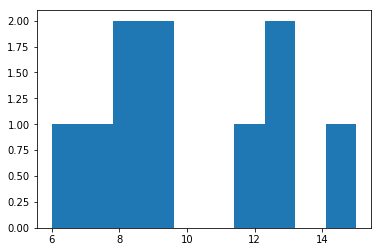

In [6]:
import math
x=math.pi
A=x/6 
part2_ob=hashit(k,A,m,hashf1)

list of hashed key values: [61, 8, 39, 15, 25, 8, 62, 43, 48, 31, 31, 54, 29, 7, 19, 27, 15, 25, 41, 17, 31, 58, 51, 5, 12, 27, 44, 38, 19, 41, 59, 54, 61, 44, 36, 11, 37, 12, 17, 41, 26, 60, 37, 16, 52, 19, 16, 61, 30, 19, 18, 11, 6, 21, 1, 58, 24, 10, 56, 27, 7, 44, 7, 32, 59, 17, 57, 56, 14, 14, 35, 25, 5, 13, 12, 11, 25, 33, 53, 18, 50, 61, 62, 47, 14, 43, 4, 3, 12, 57, 37, 32, 58, 6, 19, 25, 25, 43, 34, 9]
------------------------------------------------------------
list of values in hash table: [[], [3340], [], [2019], [2335], [5297, 8510], [8826, 5613], [5110, 700, 6244], [4040, 4355], [9900], [3538], [2468, 4736, 641], [1209, 9966, 2784, 9525], [5998], [9275, 3920, 6251], [5055, 9339], [7135, 6631], [8459, 1214, 773], [2412, 144], [4177, 3799, 4240, 8083, 7705], [], [3297], [], [], [2859], [7585, 9538, 592, 8152, 4687, 9286], [1727], [279, 846, 2043], [], [6014], [1416], [1732, 9481, 4126], [7781, 2993], [9294], [3184], [9359], [1863], [3250, 5455, 2998], [6149], [291], [], [21

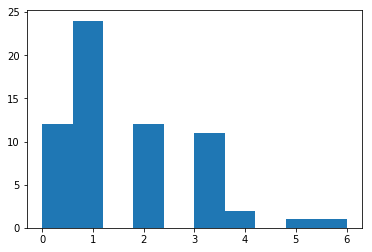

In [7]:
k=keys
A= ((5**.5)-1)/2
m=63
part3_ob=hashit(k,A,m,hashf2)